In [1]:
#import library

import pandas as pd

In [2]:
# load dataset

dataset=pd.read_csv("PreProcessed.csv")
dataset

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_11304\945655658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["age"])
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

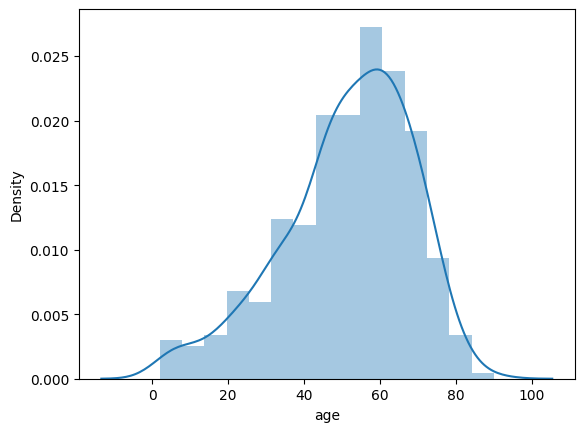

In [5]:
sns.distplot(dataset["age"])

In [6]:
# Probability Density Function

def get_pdf_probability(dataset,startrange,endrange):
    
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    
    # kde - kernel density estimate
    # axvline - Add a vertical line across the Axes.
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    
    # generate a sample
    sample = dataset
    # calculate mean, SD
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    # Normal Distribution of mean and SD - norm(mean,SD)
    dist = norm(sample_mean, sample_std)
    
    # one line for loop
    # sample probabilities for a range of outcomes
    # Probability density function pdf()
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=51.483, Standard Deviation=16.975
The area between range(40,80):0.7105209500029067


C:\Users\DELL\AppData\Local\Temp\ipykernel_11304\2350304627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.o

0.7105209500029067

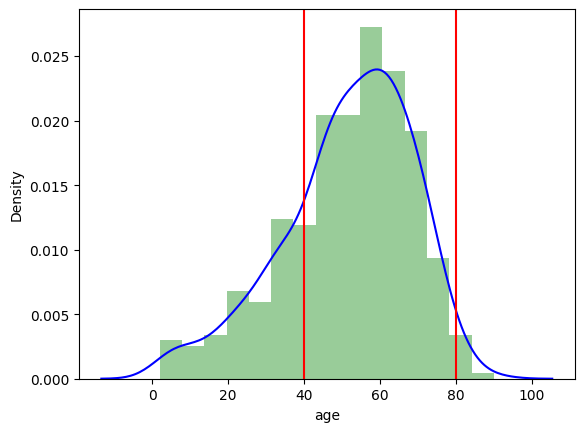

In [8]:
get_pdf_probability(dataset["age"],40,80)

In [13]:
# Cumulative Density Function

# statsmodels is a Python module
# ECDF - "Empirical Cumulative Distribution Function"

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['age'])
ecdf(80)

0.99

In [14]:
def stdNDgraph(dataset):
        
    # Coverted to standard Normal Distribution
    import seaborn as sns
    
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11304\3999413414.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda\envs\aiml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


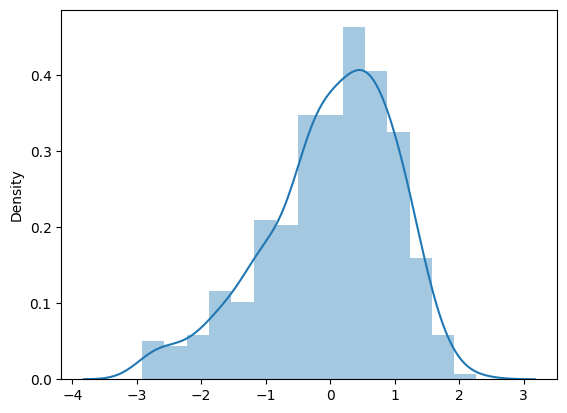

In [15]:
stdNDgraph(dataset["age"])